In [ ]:
import hashlib
import heapq
import numpy as np
import matplotlib.pyplot as plt


def normalized_hash(value):
    return int(hashlib.md5(str(value).encode()).hexdigest(), 16) / (2**128 - 1)


class KMinElements:
    def __init__(self, k):
        self.k = k
        self.heap = [] 

    def add(self, element):
        element = normalized_hash(element)
        # Use -element to simulate a max-heap
        if len(self.heap) < self.k:
            heapq.heappush(self.heap, -element) 
        elif -element > self.heap[0]:
            heapq.heappushpop(self.heap, -element)  

    def get_min_elements(self):
        return sorted(-x for x in self.heap)
    
def estimate_count_distinct(elems: KMinElements):
    if len(elems.heap) < elems.k:
        return len(elems.heap)

    return (elems.k-1)/(-elems.heap[0])

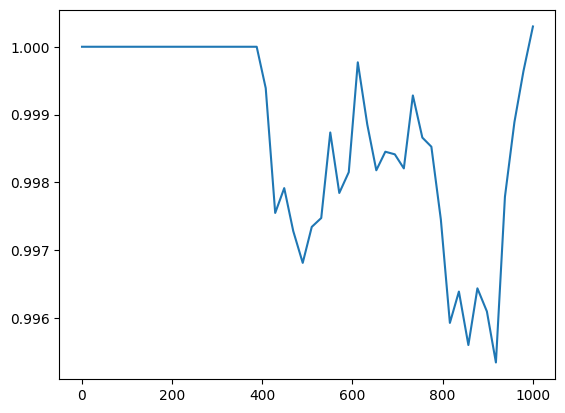

In [20]:
def get_estimates_from_sketch_at_values(xs: np.array, test_seed: int):
    gen = np.random.default_rng(test_seed)
    random_number = int(gen.uniform(1,100000))
    results = []
    sketch =KMinElements(400)
    for i in range(1, max(xs)+1):
        sketch.add(i + random_number)

        if i in xs:
            results.append(estimate_count_distinct(sketch))

    return np.array(results)

def test_sketch(amount_tests_per_point: int = 100):
    AMOUNT_POINTS = 50
    xs = np.linspace(1, 1000, AMOUNT_POINTS).astype(int)
    ys = np.zeros(AMOUNT_POINTS)
    for test_seed in range(amount_tests_per_point):
        ys += get_estimates_from_sketch_at_values(xs, test_seed)
    ys /= amount_tests_per_point
    plt.plot(xs, ys / xs)
    plt.show()

test_sketch(100)

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


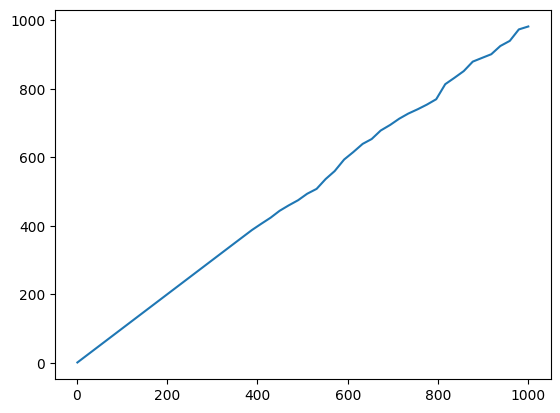

In [9]:

def get_estimates_from_sketch_at_values_v2(xs: np.array, test_seed: int):
    gen = np.random.default_rng(test_seed)
    random_number = int(gen.uniform(1,100000))
    results = []
    K = 400
    sketch1 =KMinElements(K//2)
    sketch2 =KMinElements(K//2)
    for i in range(1, max(xs)+1):
        if gen.uniform(0, 1) < 0.5:
            sketch1.add(i+random_number)
        else:
            sketch2.add(i+random_number)

        if i in xs:
            results.append(estimate_count_distinct(sketch1) + estimate_count_distinct(sketch2))

    return np.array(results)

def test_sketch_v2(amount_tests_per_point: int = 1):
    AMOUNT_POINTS = 50
    xs = np.linspace(1, 1000, AMOUNT_POINTS).astype(int)
    ys = np.zeros(AMOUNT_POINTS)
    for test_seed in range(amount_tests_per_point):
        ys += get_estimates_from_sketch_at_values_v2(xs, test_seed)
    ys /= amount_tests_per_point
    plt.plot(xs, ys )
    plt.show()

test_sketch_v2()
